In [1]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [13]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [14]:
len(iris.data)

150

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
data['target'] = iris.target

In [21]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [28]:
data['flower_name'] = data['target'].apply(lambda X: iris.target_names[X])

In [33]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [34]:
data.flower_name.value_counts()

setosa        50
versicolor    50
virginica     50
Name: flower_name, dtype: int64

In [62]:
data0 = data[0:50]
data1 = data[50:100]
data2 = data[100:150]

In [66]:
len(data2)

50

In [67]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Petal Width')

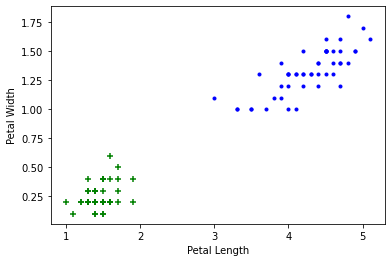

In [72]:
plt.scatter(data0['petal length (cm)'], data0['petal width (cm)'], marker='+', color='green')
plt.scatter(data1['petal length (cm)'], data1['petal width (cm)'], marker='.', color='blue')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Speal Width')

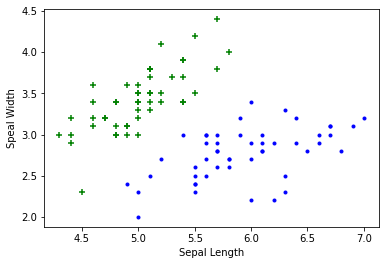

In [71]:
plt.scatter(data0['sepal length (cm)'], data0['sepal width (cm)'], marker='+', color='green')
plt.scatter(data1['sepal length (cm)'], data1['sepal width (cm)'], marker='.', color='blue')
plt.xlabel('Sepal Length')
plt.ylabel('Speal Width')

In [74]:
X = data.drop(['target','flower_name'], axis=1)
y = data.target

In [75]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [77]:
len(X)

150

In [78]:
len(y)

150

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [81]:
from sklearn.svm import SVC

In [82]:
svc = SVC()

In [83]:
svc.fit(X_train,y_train)

SVC()

In [84]:
svc.score(X_test,y_test)

1.0

In [85]:
svc.predict([[5.0,3.6,1.4,0.2]])

C:\Users\Arayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [87]:
data.tail([[6.5,3.0,5.2,2.0]])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [88]:
svc.predict([[6.5,3.0,5.2,2.0]])

C:\Users\Arayan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [91]:
svc_c = SVC(C=10)
svc_c.fit(X_train,y_train)
svc_c.score(X_test,y_test)

1.0

In [92]:
svc_g = SVC(gamma=10)
svc_g.fit(X_train,y_train)
svc_g.score(X_test,y_test)

1.0

In [93]:
svc_linear_kernal = SVC(kernel='linear')
svc_linear_kernal.fit(X_train,y_train)
svc_linear_kernal.score(X_test,y_test)

1.0

## Exercise

In [94]:
from sklearn.datasets import load_digits

In [95]:
df = load_digits()

In [97]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [100]:
df.data[0:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [103]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [104]:
df.target

array([0, 1, 2, ..., 8, 9, 8])

In [105]:
df.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

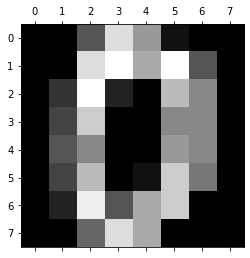

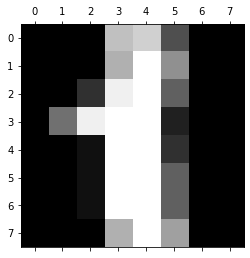

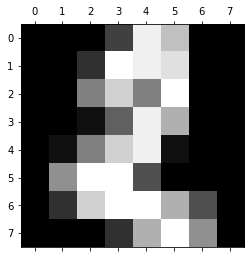

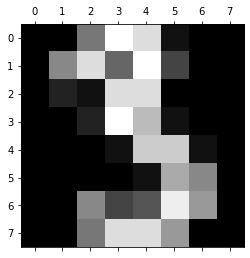

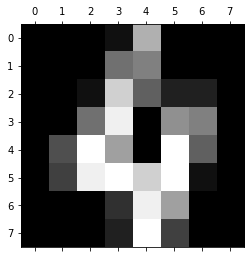

In [111]:
plt.gray()
for i in range(5):
    plt.matshow(df.images[i])

In [112]:
X = df.data
y = df.target

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [115]:
from sklearn.svm import SVC

In [116]:
model = SVC()

In [117]:
model.fit(X_train,y_train)

SVC()

In [119]:
model.score(X_train,y_train)

0.9965205288796103

In [118]:
model.score(X_test,y_test)

0.9861111111111112

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(X_test))
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 38]], dtype=int64)

In [121]:
import seaborn as sns

Text(159.0, 0.5, 'Truth')

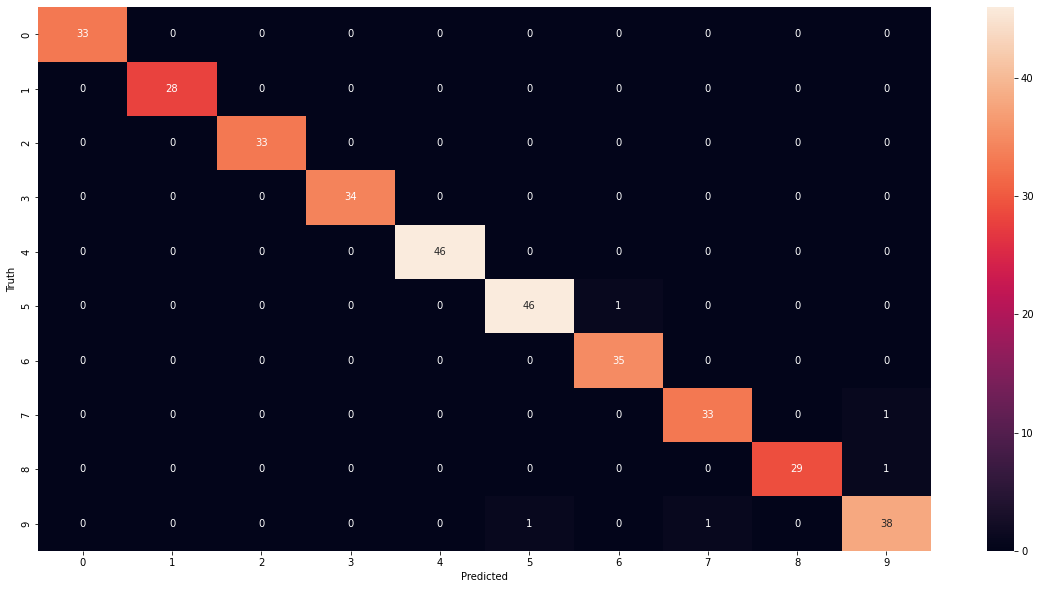

In [124]:
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [137]:
model_C = SVC(C=5)
model_C.fit(X_train,y_train)
model_C.score(X_test,y_test)

0.9888888888888889

In [145]:
model_g = SVC(gamma=5)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

0.07777777777777778

In [156]:
model_linear_kernal = SVC(kernel='poly')
model_linear_kernal.fit(X_train,y_train)
model_linear_kernal.score(X_test,y_test)

0.9916666666666667

In [157]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_linear_kernal.predict(X_test))
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 39]], dtype=int64)

Text(159.0, 0.5, 'Truth')

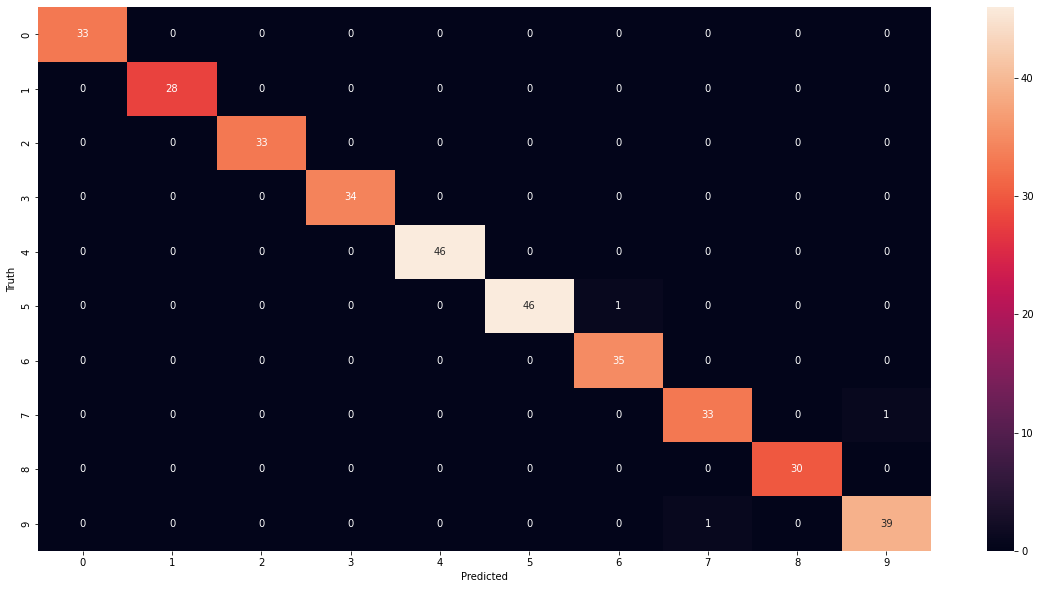

In [158]:
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')